In [1]:
import os

%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd

from duke_dbt_data import dcmread_image, read_boxes, draw_box

In [2]:
df = read_boxes(boxes_fp="data/boxes-validation.csv", filepaths_fp="data/file-paths-validation.csv")

In [3]:
df = pd.read_csv("data/boxes-validation.csv")
# Cargar el DataFrame desde un archivo pickle serializado
merged_df = pd.read_csv("data/file-paths-validation.csv")

# Fusionar los DataFrames en uno solo basado en las columnas comunes
merged_df2 = pd.merge(merged_df, df, on=["PatientID", "StudyUID", "View"])

box_series = merged_df2.query("PatientID == 'DBT-P00431' and View == 'rmlo'")
box_series = box_series.iloc[0]
print(box_series.shape)
#box_series = merged_df2.iloc[25]
#print(box_series.shape)
view = box_series["View"]
slice_index = box_series["Slice"]
# if you have image data saved in classic path folder structure, read the file path from "classic_path"
# image_path = os.path.join("/data", view_series["classic_path"])
image_path = os.path.join("G:/Radiografias Validacion", box_series['descriptive_path'])

# Reemplazar "NA" con otro valor
image_path = image_path.replace("000000-", "000000-NA-")

print("Ruta original:", image_path)
#print("Ruta modificada:", new_image_path)

(14,)
Ruta original: G:/Radiografias Validacion\Breast-Cancer-Screening-DBT/DBT-P00431/01-01-2000-DBT-S03956-MAMMO diagnostic digital bilateral-25878/17599.000000-NA-57324/1-1.dcm


In [4]:
%%time
image = dcmread_image(fp=image_path, view=view, index=slice_index)

CPU times: total: 32 s
Wall time: 32.3 s


C:\Users\Miguel\anaconda3\envs\tf\lib\site-packages\pydicom\pixel_data_handlers\pillow_handler.py:238: UserWarning: The (0028,0101) 'Bits Stored' value (10-bit) doesn't match the JPEG 2000 data (16-bit). It's recommended that you change the 'Bits Stored' value
  warnings.warn(


In [5]:
x, y, width, height = box_series[["X", "Y", "Width", "Height"]]
image = draw_box(image=image, x=x, y=y, width=width, height=height, lw=10)

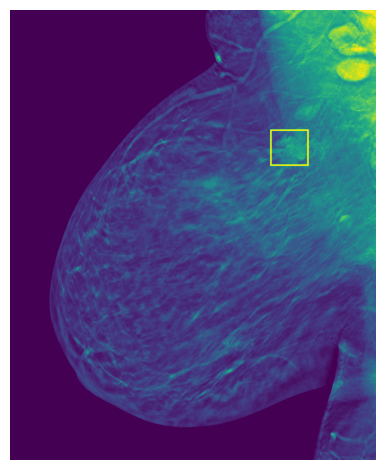

In [9]:
plt.figure()
plt.imshow(image)
plt.axis('off')  # Oculta los ejes
plt.tight_layout()
plt.show()

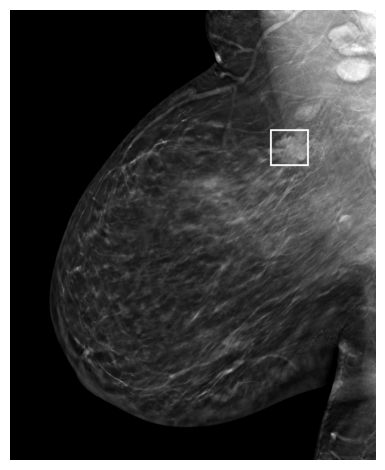

In [12]:
plt.figure()
plt.axis('off')  # Oculta los ejes
plt.tight_layout()
plt.imshow(image, cmap=plt.cm.gray);
plt.savefig('DBT-imagenes-numeradas.png', bbox_inches='tight', pad_inches=0.1)